In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from sascorer import calculateScore

In [166]:
## file io
training_dataset_path = '~/Github/rl_graph_generation/gym-molecule/gym_molecule/dataset/250k_rndm_zinc_drugs_clean.smi'  # single smiles column
generated_dataset_path = '~/Github/rl_graph_generation/molecule_gen/mw_target_generated.smi'  #'~/Desktop/experiment results/current_zinc_qed_results/qed_generated.smi'# single smiles column

training_df = pd.read_csv(training_dataset_path, header=None, names=['smiles'])
training_s = training_df['smiles']
generated_df = pd.read_csv(generated_dataset_path, header=None, names=['smiles'])
generated_s = generated_df['smiles']

In [47]:
# # TEST datasets, for DEBUG only
# training_s = training_df['smiles'][100000:200000]
# generated_s = training_df['smiles'][10000:20000].append(training_df['smiles'][0:5]).append(training_df['smiles'][10:15])

In [167]:
# take a sample from the training dataset and the generated dataset
# n = 2000
# assert n <= len(training_s)
# assert n <= len(generated_s)
training_s = training_s#.sample(n)
generated_s = generated_s#.sample(n)
#print(generated_s)

In [168]:
## statistics

# % unique within generated
print('% unique within generated: {}'.format(len(generated_s.unique()) / len(generated_s)))

# % unique within training (as a check)
print('% unique within training: {}'.format(len(training_s.unique()) / len(training_s)))

# % unique compared to training
gen_set = set(generated_s)
training_set = set(training_s)
num_intersect = len(gen_set.intersection(training_set))
print('% unique compared to training: {}'.format((len(gen_set) - num_intersect) / len(gen_set)))

# internal diversity
# TODO(Bowen): figure out a reasonable way to calculate. Look at https://github.com/gablg1/ORGAN and https://github.com/mostafachatillon/ChemGAN-challenge

## training dataset
# MW
# mw_train_list = [Descriptors.MolWt(Chem.MolFromSmiles(s)) for s in training_s]
# print('train MW mean: {}'.format(np.array(mw_train_list).mean()))
# print('train MW std: {}'.format(np.array(mw_train_list).std()))
# # logP
# logp_train_list = [Descriptors.MolLogP(Chem.MolFromSmiles(s)) for s in training_s]
# print('train logP max: {}'.format(np.array(logp_train_list).max()))
# print('train logP mean: {}'.format(np.array(logp_train_list).mean()))
# print('train logP std: {}'.format(np.array(logp_train_list).std()))
# # SA
# sa_train_list = [calculateScore(Chem.MolFromSmiles(s)) for s in training_s]
# print('train SA mean: {}'.format(np.array(sa_train_list).mean()))
# print('train SA std: {}'.format(np.array(sa_train_list).std()))
# # QED
# qed_train_list = [Descriptors.qed(Chem.MolFromSmiles(s)) for s in training_s]
# print('train QED max: {}'.format(np.array(qed_train_list).max()))
# print('train QED mean: {}'.format(np.array(qed_train_list).mean()))
# print('train QED std: {}'.format(np.array(qed_train_list).std()))

## generated dataset
#MW
# mw_diversity = 0
mw_in_range=[s for s in generated_s if Descriptors.MolWt(Chem.MolFromSmiles(s)) >= 150 and Descriptors.MolWt(Chem.MolFromSmiles(s)) <=200]
mw_success_rate = len(mw_in_range)/len(generated_s)
# print(len(mw_in_range))
# count = 0
# for i in range(len(mw_in_range)):
#     for j in range(len(mw_in_range)):
#         if i==j:
#             continue
#         else:
#             mol_1 = Chem.MolFromSmiles(mw_in_range[i])
#             mol_2 = Chem.MolFromSmiles(mw_in_range[j])
#             Chem.SanitizeMol(mol_1, sanitizeOps=Chem.SanitizeFlags.SANITIZE_KEKULIZE)
#             Chem.SanitizeMol(mol_2, sanitizeOps=Chem.SanitizeFlags.SANITIZE_KEKULIZE)
#             fp_1 = Chem.RDKFingerprint(mol_1)
#             fp_2 = Chem.RDKFingerprint(mol_2)
#             #print(DataStructs.TanimotoSimilarity(fp_1, fp_2))
#             count += 1
#             mw_diversity += DataStructs.TanimotoSimilarity(fp_1, fp_2)
print('mw_target success rate: ',mw_success_rate )
# print('mw_diversity: ', mw_diversity/count)
mw_gen_list = [Descriptors.MolWt(Chem.MolFromSmiles(s)) for s in generated_s]
print('gen MW mean: {}'.format(np.array(mw_gen_list).mean()))
print('gen MW std: {}'.format(np.array(mw_gen_list).std()))
# # logP
# logp_in_range=[s for s in generated_s if Descriptors.MolLogP(Chem.MolFromSmiles(s)) >= 5 and Descriptors.MolLogP(Chem.MolFromSmiles(s)) <=5.5]
# logp_success_rate = len(logp_in_range)/len(generated_s)
# print('logp_target success rate: ',logp_success_rate )
# logp_gen_list = [Descriptors.MolLogP(Chem.MolFromSmiles(s)) for s in generated_s]
# print('gen logP max: {}'.format(np.array(logp_gen_list).max()))
# print('gen logp second: {}'.format(np.sort(np.array(logp_gen_list))[::-1][1]))
# print('gen logp third: {}'.format(np.sort(np.array(logp_gen_list))[::-1][2]))
# print('gen logP mean: {}'.format(np.array(logp_gen_list).mean()))
# print('gen logP std: {}'.format(np.array(logp_gen_list).std()))
# # SA
# sa_gen_list = [calculateScore(Chem.MolFromSmiles(s)) for s in generated_s]
# print('gen SA mean: {}'.format(np.array(sa_gen_list).mean()))
# print('gen SA std: {}'.format(np.array(sa_gen_list).std()))
#QED
#print(generated_s)
# for i in range(len(generated_s)):
#     if Chem.MolFromSmiles(generated_s[i]) is None:
#         print(i)
#         print(generated_s[i])
    #Descriptors.qed(Chem.MolFromSmiles(generated_s[i]))
# qed_gen_list = [Descriptors.qed(Chem.MolFromSmiles(s)) for s in generated_s if Chem.MolFromSmiles(s) ]
# print('gen QED max: {}'.format(np.array(qed_gen_list).max()))
# print('gen QED second: {}'.format(np.sort(np.array(qed_gen_list))[::-1][1]))
# print('gen QED third: {}'.format(np.sort(np.array(qed_gen_list))[::-1][2]))
# print('gen QED mean: {}'.format(np.array(qed_gen_list).mean()))
# print('gen QED std: {}'.format(np.array(qed_gen_list).std()))

% unique within generated: 1.0
% unique within training: 1.0
% unique compared to training: 1.0
mw_target success rate:  0.012987012987012988
gen MW mean: 394.56398989899
gen MW std: 97.8541339162662


In [141]:
logp_gen_list = [Chem.MolFromSmiles(s) for s in generated_s if Descriptors.MolLogP(Chem.MolFromSmiles(s)) > 12.0]
print(len(logp_gen_list))


6


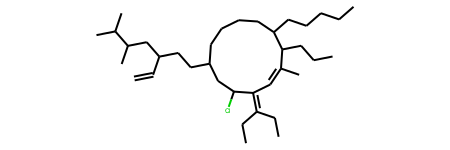

In [143]:
logp_gen_list[4]

In [142]:
#logp_gen_list[0]
for i in range(len(logp_gen_list)):
    print(str(i)+ ' '+ str(Descriptors.MolLogP(logp_gen_list[i])))
#print(Descriptors.MolLogP(logp_gen_list[0]))

0 12.113599999999982
1 12.041299999999982
2 12.20399999999998
3 12.841419999999976
4 13.114399999999977
5 12.662499999999978


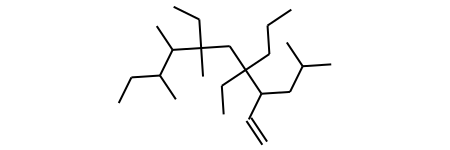

In [79]:
logp_gen_list[31]

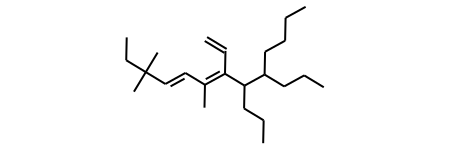

In [84]:
logp_gen_list[12]

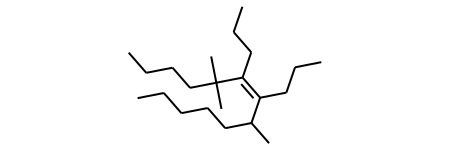

In [85]:
logp_gen_list[10]

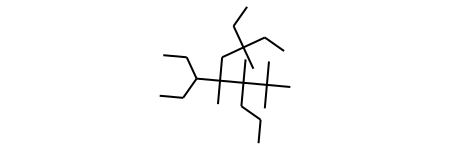

In [86]:
logp_gen_list[2]

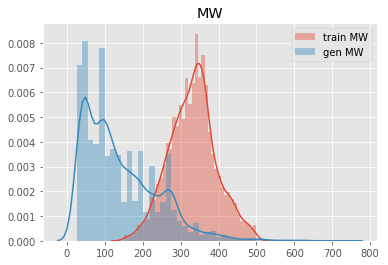

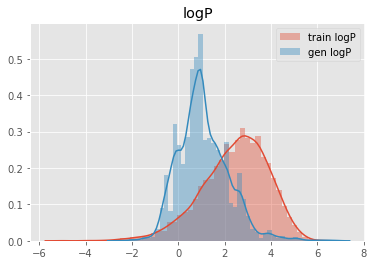

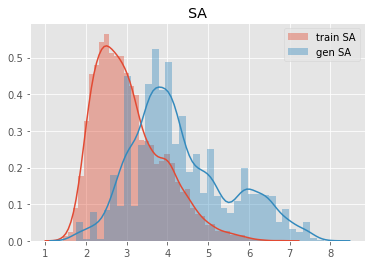

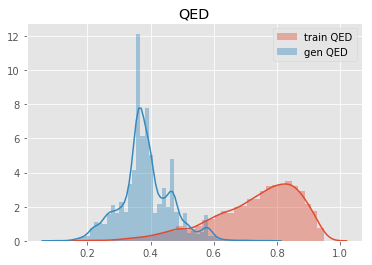

In [27]:
# histograms
plt.style.use('ggplot')
n_bins = 50

# MW
sns.distplot(mw_train_list, hist=True, kde=True, label='train MW')
sns.distplot(mw_gen_list, hist=True, kde=True, label='gen MW')
plt.legend(loc='upper right')
plt.title('MW')
plt.show()
# logP
sns.distplot(logp_train_list, hist=True, kde=True, label='train logP')
sns.distplot(logp_gen_list, hist=True, kde=True, label='gen logP')
plt.legend(loc='upper right')
plt.title('logP')
plt.show()
# SA
sns.distplot(sa_train_list, hist=True, kde=True, label='train SA')
sns.distplot(sa_gen_list, hist=True, kde=True, label='gen SA')
plt.legend(loc='upper right')
plt.title('SA')
plt.show()
# QED
sns.distplot(qed_train_list, hist=True, kde=True, label='train QED')
sns.distplot(qed_gen_list, hist=True, kde=True, label='gen QED')
plt.legend(loc='upper right')
plt.title('QED')
plt.show()

In [154]:
##  reward specific statistics

# ??

In [ ]:
# FCD score

#TODO(Bowen)